In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

np.seterr(divide="ignore", invalid="ignore",)

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [5]:
def Rank(you, ref, controler=1):
    # init
    total_points = 0

    # cal gradient
    d_you, d_ref = [], []

    for t in range(1, len(you)):
        d_you.append(you[t] - you[t - 1])
        d_ref.append(ref[t] - ref[t - 1])

    # cal total_points
    d_you, d_ref = np.array(d_you), np.array(d_ref)
    score = np.nan_to_num(d_you / (d_ref + d_you))
    mul = d_ref * d_you
    points = []

    for t in range(len(mul)):
        if mul[t] > 0:
            points.append(-400 * score[t] * (score[t] - 1))
        elif mul[t] < 0:
            points.append(0)
        elif mul[t] == 0:
            if d_you[t] == 0 and d_ref[t] == 0:
                if t == 0:
                    points.append(0)
                else:
                    if mul[t - 1] < 0:
                        points.append(0)
                    elif mul[t - 1] > 0:
                        points.append(100)
            elif (d_you[t] == 0 and d_ref[t] != 0) or (d_you[t] != 0 and d_ref[t] == 0):
                points.append(0)

    total_points = np.array(points).mean()

    # return rank
    if controler == 2:
        total_points += 20
    elif controler == 3:
        total_points += 40

    threshold = ["A+", "A", "B+", "B", "C+", "C", "D+", "D", "E+", "E"]

    for i in range(len(threshold)):
        if total_points >= (9 - i) * 10:
            rank = threshold[i]
            break

    return rank

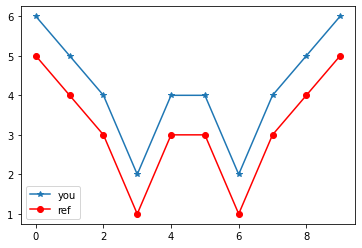

A+


In [7]:
you = [6, 5, 4, 2, 4, 4, 2, 4, 5, 6]
ref = [5, 4, 3, 1, 3, 3, 1, 3, 4, 5]

plt.plot(you, marker="*")
plt.plot(ref, color="red", marker="o")
plt.legend(["you", "ref"])
plt.show()

print(Rank(you, ref))